<a href="https://colab.research.google.com/github/harshbelani/M.Tech-DS/blob/master/Deep_Learning/DL_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Required libraries

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D, Dropout
from keras.optimizers import SGD

#Loading Cifar100 dataset

In [19]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [20]:
print("Train dataset = ", X_train.shape)
print("Train dataset labels = ", y_train.shape)
print("Test dataset = ", X_test.shape)
print("Test dataset labels = ", y_test.shape)

Train dataset =  (50000, 32, 32, 3)
Train dataset labels =  (50000, 1)
Test dataset =  (10000, 32, 32, 3)
Test dataset labels =  (10000, 1)


#normalizing dataset

In [21]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

#One-hot encoding of labels

In [22]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [23]:
y_test.shape

(10000, 10)

In [24]:
y_train.shape

(50000, 10)

There are 10 categories in Cifar100 dataset.

#Model Building

## Simple Model

In [25]:
from keras.models import Sequential                         
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD, Adam, RMSprop

In [27]:
model1 = Sequential()
model1.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model1.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(MaxPooling2D((2,2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(MaxPooling2D((2,2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(MaxPooling2D((2,2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Dense(10,activation='softmax'))

In [28]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)       

In [29]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history1=model1.fit(X_train,y_train,epochs=50,validation_split=0.2,verbose=1)

Epoch 1/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3519 - accuracy: 0.5236 - val_loss: 1.0039 - val_accuracy: 0.6402
Epoch 2/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8935 - accuracy: 0.6844 - val_loss: 0.9232 - val_accuracy: 0.6866
Epoch 3/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7291 - accuracy: 0.7455 - val_loss: 0.8683 - val_accuracy: 0.6931
Epoch 4/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6246 - accuracy: 0.7817 - val_loss: 0.7615 - val_accuracy: 0.7391
Epoch 5/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5385 - accuracy: 0.8126 - val_loss: 0.7287 - val_accuracy: 0.7524
Epoch 6/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.4696 - accuracy: 0.8346 - val_loss: 0.6117 - val_accuracy: 0.7954
Epoch 7/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.4095 - accuracy: 0.8573 - val_loss: 0.6798 - val_accuracy:

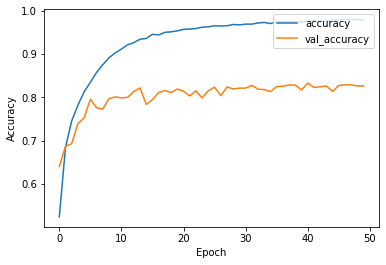

In [37]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

In [31]:
model1.evaluate(X_test,y_test,batch_size=64)

157/157 [==============================] - 0s 3ms/step - loss: 0.8867 - accuracy: 0.8193


[0.8867400288581848, 0.8192999958992004]

## LeNet5 Architecture

In [32]:
classifier=Sequential()
classifier.add(Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),activation="sigmoid",input_shape=(32,32,3)))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation="sigmoid"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=120,activation='sigmoid'))
classifier.add(Dense(units=84,activation='sigmoid'))
classifier.add(Dense(units=10,activation='softmax'))

classifier.compile(loss='mse',metrics=['accuracy'],optimizer='adam')

In [33]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

In [34]:
classifier.fit(X_train,y_train,epochs=100,batch_size=32,steps_per_epoch=30,validation_split=0.2)

Epoch 1/100
30/30 [==============================] - 1s 27ms/step - loss: 0.0905 - accuracy: 0.0885 - val_loss: 0.0904 - val_accuracy: 0.0977
Epoch 2/100
30/30 [==============================] - 1s 22ms/step - loss: 0.0903 - accuracy: 0.1083 - val_loss: 0.0901 - val_accuracy: 0.1022
Epoch 3/100
30/30 [==============================] - 1s 21ms/step - loss: 0.0903 - accuracy: 0.0833 - val_loss: 0.0901 - val_accuracy: 0.1014
Epoch 4/100
30/30 [==============================] - 1s 21ms/step - loss: 0.0903 - accuracy: 0.0906 - val_loss: 0.0901 - val_accuracy: 0.0997
Epoch 5/100
30/30 [==============================] - 1s 21ms/step - loss: 0.0902 - accuracy: 0.1021 - val_loss: 0.0902 - val_accuracy: 0.1016
Epoch 6/100
30/30 [==============================] - 1s 21ms/step - loss: 0.0900 - accuracy: 0.1146 - val_loss: 0.0901 - val_accuracy: 0.0997
Epoch 7/100
30/30 [==============================] - 1s 22ms/step - loss: 0.0902 - accuracy: 0.1073 - val_loss: 0.0900 - val_accuracy: 0.1014
Epoch 

In [38]:
classifier.evaluate(X_test,y_test,batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.3860


[0.07451857626438141, 0.38600000739097595]

## VGG-16 Architecture

In [35]:
model_vgg16=Sequential()

model_vgg16.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu",input_shape=(32,32,3)))
model_vgg16.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"))
model_vgg16.add(MaxPooling2D(pool_size=(2,2)))

model_vgg16.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"))
model_vgg16.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"))
model_vgg16.add(MaxPooling2D(pool_size=(2,2),padding="same"))

model_vgg16.add(Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"))
model_vgg16.add(Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"))
model_vgg16.add(Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"))
model_vgg16.add(MaxPooling2D(pool_size=(2,2),padding="same"))

model_vgg16.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model_vgg16.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model_vgg16.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model_vgg16.add(MaxPooling2D(pool_size=(2,2),padding="same"))

model_vgg16.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model_vgg16.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model_vgg16.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model_vgg16.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model_vgg16.add(Flatten())
model_vgg16.add(Dense(units=128,activation='relu'))
model_vgg16.add(Dense(units=10,activation='softmax'))

opt = SGD(lr = 0.01, momentum = 0.9)
model_vgg16.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

In [39]:
steps = int(X_train.shape[0] / 64)
model_vgg16.fit(X_train,y_train,epochs=30,batch_size=32,steps_per_epoch=steps,validation_data=(X_test,y_test),verbose = 1)#,steps_per_epoch=1000

Epoch 1/30
781/781 [==============================] - 18s 23ms/step - loss: 2.3034 - accuracy: 0.1002 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/30
781/781 [==============================] - 17s 22ms/step - loss: 2.3033 - accuracy: 0.0989 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 3/30
781/781 [==============================] - 17s 22ms/step - loss: 2.3034 - accuracy: 0.0961 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 4/30
781/781 [==============================] - 17s 22ms/step - loss: 2.3033 - accuracy: 0.1002 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 5/30
781/781 [==============================] - 17s 22ms/step - loss: 2.3035 - accuracy: 0.0972 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/30
781/781 [==============================] - 17s 22ms/step - loss: 2.3035 - accuracy: 0.0968 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 7/30
781/781 [==============================] - 17s 22ms/step - loss: 2.3033 - accuracy: 0.0994 - val_loss: 2.3033 - val_accuracy:

In [44]:
model_vgg16.evaluate(X_test,y_test,batch_size=64)

157/157 [==============================] - 1s 5ms/step - loss: 2.3031 - accuracy: 0.1000


[2.3030779361724854, 0.10000000149011612]

## AlexNet Architecture

In [40]:
model_alexnet=Sequential()

model_alexnet.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="same",activation="relu",input_shape=(32,32,3)))
model_alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

model_alexnet.add(Conv2D(filters=256,kernel_size=(11,11),strides=(1,1),padding="same",activation="relu"))
model_alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

model_alexnet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model_alexnet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model_alexnet.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model_alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

model_alexnet.add(Flatten())
model_alexnet.add(Dense(units=4096,input_shape=(32*32*3,),activation='relu'))
model_alexnet.add(Dropout(0.4))
model_alexnet.add(Dense(units=4096,activation='relu'))
model_alexnet.add(Dropout(0.4))
model_alexnet.add(Dense(units=1000,activation='relu'))
model_alexnet.add(Dropout(0.4))
model_alexnet.add(Dense(units=10,activation='softmax'))

model_alexnet.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [43]:
steps = int(X_train.shape[0] / 64)
model_alexnet.fit(X_train,y_train,epochs=30,batch_size=32,steps_per_epoch=100,validation_data=(X_test,y_test),verbose = 1)

Epoch 1/30
100/100 [==============================] - 3s 30ms/step - loss: 2.3060 - accuracy: 0.0934 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/30
100/100 [==============================] - 3s 28ms/step - loss: 2.3034 - accuracy: 0.1028 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/30
100/100 [==============================] - 3s 28ms/step - loss: 2.3030 - accuracy: 0.1013 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/30
100/100 [==============================] - 3s 28ms/step - loss: 2.3034 - accuracy: 0.0941 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/30
100/100 [==============================] - 3s 29ms/step - loss: 2.3031 - accuracy: 0.0950 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/30
100/100 [==============================] - 3s 29ms/step - loss: 2.3023 - accuracy: 0.1041 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 7/30
100/100 [==============================] - 3s 29ms/step - loss: 2.3034 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000

In [45]:
model_alexnet.evaluate(X_test,y_test,batch_size=64)

157/157 [==============================] - 1s 5ms/step - loss: 2.3027 - accuracy: 0.1000


[2.3026719093322754, 0.10000000149011612]